# ESMAC: Generate a 1-D Historgram Plot
---

<b>Setup dependencies:</b>

In [1]:

import os
import numpy as np
import xarray as xr
import pandas as pd

# these sys settings are just for the jupyterhub demo
import sys
sys.path.append('/home/'+os.environ['USER']+'/.local/lib/python3.9/site-packages')

import esmac_diags.plotting.plot_esmac_diags as plot



Matplotlib created a temporary config/cache directory at /tmp/matplotlib-cadr_2ud because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.



<br>
<b>Configure settings:</b>

In [2]:
# set site name.
site = 'HISCALE'

# path of prepared files

data_path = '~/ARM-Notebooks/Open-Science-Workshop-2022/tutorials/ESMAC_diags/ESMAC_Diags_testcase/prep_data/'

prep_model_path = data_path +site+'/model/'
prep_obs_path = data_path +site+'/surface/'
prep_obs_path_2 = data_path +site+'/satellite/'
# set output path for plots
figpath= '~/ARM-Notebooks/Open-Science-Workshop-2022/tutorials/ESMAC_diags/ESMAC_Diags_testcase/figures/'+site+'/surface/'




<br>
<b>Read in data:</b>

In [3]:

filename = prep_obs_path + 'cod_'+site+'.nc'
obsdata = xr.open_dataset(filename)
time_arm = obsdata['time'].load()
cod_arm = obsdata['cod'].load()
obsdata.close()

filename = prep_obs_path_2 + 'cod_VISSTgrid_'+site+'.nc'
satdata = xr.open_dataset(filename)
time_sat = satdata['time'].load()
cod_sat = satdata['cod'].load()
satdata.close()

filename = prep_model_path + 'E3SMv1_'+site+'_sfc.nc'
modeldata = xr.open_dataset(filename)
time_m1 = modeldata['time'].load()
cod_e3sm1 = modeldata['cod'].load()
modeldata.close()

filename = prep_model_path + 'E3SMv2_'+site+'_sfc.nc'
modeldata = xr.open_dataset(filename)
time_m2 = modeldata['time'].load()
cod_e3sm2 = modeldata['cod'].load()
modeldata.close()



<br>
<b>Specific data treatment:</b>

In [4]:
IOP=''
# trim for the same time period
IOP = 'IOP1'
time1 = np.datetime64('2016-04-25')
time2 = np.datetime64('2016-05-22')
time = pd.date_range(start='2016-04-25', end='2016-05-22', freq="H")
# IOP = 'IOP2'
# time1 = np.datetime64('2016-08-28')
# time2 = np.datetime64('2016-09-23')
# time = pd.date_range(start='2016-08-28', end='2016-09-23', freq="H")

cod_arm = cod_arm[np.logical_and(time_arm>=time1, time_arm<=time2)]
cod_sat = cod_sat[np.logical_and(time_sat>=time1, time_sat<=time2)]
cod_e3sm1 = cod_e3sm1[np.logical_and(time_m1>=time1, time_m1<=time2)]
cod_e3sm2 = cod_e3sm2[np.logical_and(time_m2>=time1, time_m2<=time2)]

minval = 1
cod_arm[cod_arm<minval] = np.nan
cod_sat[cod_sat<minval] = np.nan
cod_e3sm1[cod_e3sm1<minval] = np.nan
cod_e3sm2[cod_e3sm2<minval] = np.nan



<br>
<b>Output Plot:</b>

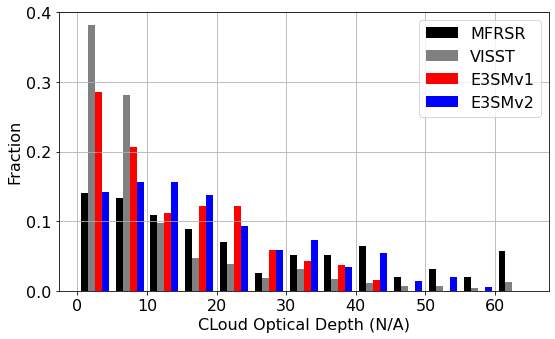

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# output plot
if not os.path.exists(figpath):
    os.makedirs(figpath)

w1 = np.ones_like(cod_arm)/sum(~np.isnan(cod_arm.data))
w2 = np.ones_like(cod_sat)/sum(~np.isnan(cod_sat.data))
w3 = np.ones_like(cod_e3sm1)/sum(~np.isnan(cod_e3sm1.data))
w4 = np.ones_like(cod_e3sm2)/sum(~np.isnan(cod_e3sm2.data))
fig,ax = plot.hist([cod_arm, cod_sat, cod_e3sm1, cod_e3sm2], bins=np.arange(0,66,5), weights=[w1, w2, w3, w4], \
                   legend=['MFRSR','VISST', 'E3SMv1', 'E3SMv2'], color=['k','gray','r','b'],
                   xlabel='CLoud Optical Depth (N/A)', ylabel='Fraction', title=None)


#fig.savefig(figpath+'hist_cod_'+site+'_'+IOP+'.png',dpi=fig.dpi,bbox_inches='tight', pad_inches=1)




# show figures in interactive commandline screen
import matplotlib.pyplot as plt
plt.show()   